## Step1: gathering Data or creating

## Step 2: Importing necessary Python libraries and loading the data.

In [2]:
# Step1: Loading the data
#import pandas libaries
import pandas as pd
df=pd.read_csv("Zomato-data.csv")

## Step 3: Data Cleaning and Preparation

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
# 2. Getting summary of the dataframe use df.info().
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
df.describe()  #stsstics oveerview of the data frame

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


## Before moving further we need to clean and process the data.

1. Convert the rate column to a float by removing denominator characters.

dataframe['rate']=dataframe['rate'].apply(handleRate): Applies the handleRate function to clean and convert each rating value in the 'rate' column.



In [6]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [8]:
# 3. Checking for missing or null values to identify any data gaps.
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Text(0.5, 0, 'Popular resturant')

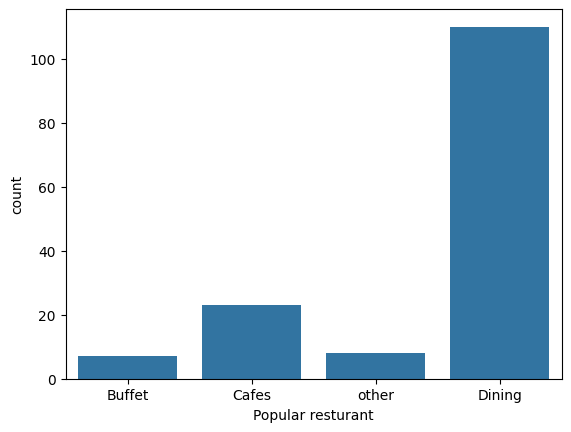

In [9]:
# Step 4: Exploring Restaurant Types
#1. Let's see the listed_in (type) column to identify popular restaurant categories.
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Popular resturant")


# Conclusion: The majority of the restaurants fall into the dining category.

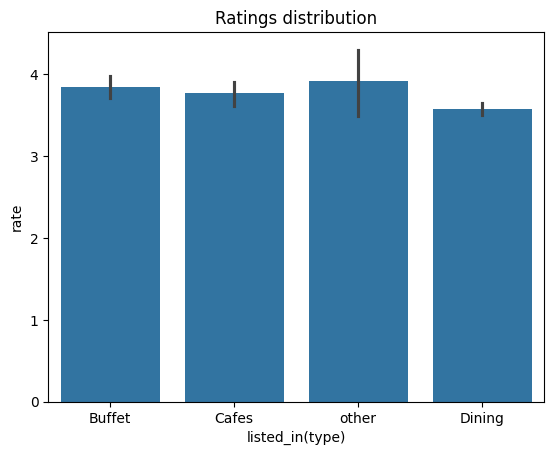

In [10]:
sns.barplot(x=df['listed_in(type)'],y=df['rate'])
plt.title("Ratings distribution")
plt.show()

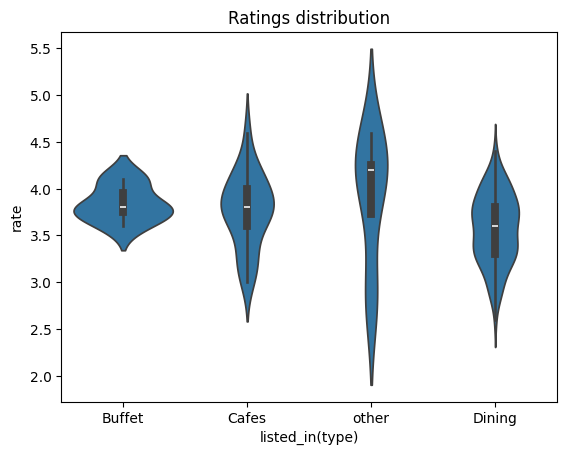

In [11]:
sns.violinplot(x=df['listed_in(type)'],y=df['rate'])
plt.title("Ratings distribution")
plt.show()

2. Votes by Restaurant Type

Here we get the count of votes for each category.

Text(0, 0.5, 'Votes')

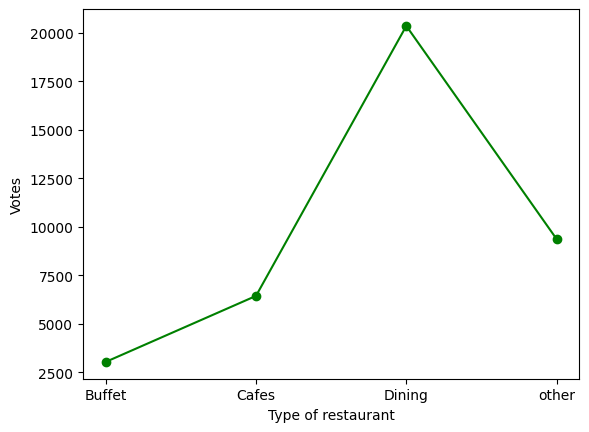

In [15]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [ ]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
grouped_data
# Result: grouped_data is a list that shows how many total votes each type of restaurant has.

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [ ]:
result = pd.DataFrame({'votes': grouped_data})
result
# Result: result is now a table where each row shows the type of restaurant and the total number of votes for that type.

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


# final summary of the code:
  1.Group the data by restaurant type and add up the votes for each type.
  2.Create a new table that shows each type of restaurant and its total votes.
  3.Make a line chart with the types of restaurants on the bottom and the number of votes on the side.
4.Label the chart so it's clear: the bottom shows the restaurant types, and the side shows the number of votes.

# Step 5: Identify the Most Voted Restaurant
Find the restaurant with the highest number of votes.

In [22]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


In [23]:
max_votes = df['votes'].max()
max_votes

np.int64(4884)

In [25]:
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
restaurant_with_max_votes

38    Empire Restaurant
Name: name, dtype: object

restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']
Explanation:

df.loc[]: This is a way to filter or select specific rows and columns from your DataFrame.

df.loc[] lets you pick rows based on a condition (a logical statement) and specific columns you want.

df['votes'] == max_votes:

This is a condition that checks where the 'votes' column equals the value stored in max_votes (the highest number of votes from the previous step).

It creates a boolean mask (True/False values) where True means that restaurant has the maximum votes.

'name': This part specifies that, once we’ve found the rows where the vote count is equal to the maximum votes, we want to select the restaurant name from the 'name' column.

Result:

restaurant_with_max_votes will now hold the name(s) of the restaurant(s) with the highest number of votes.

<Axes: xlabel='online_order', ylabel='count'>

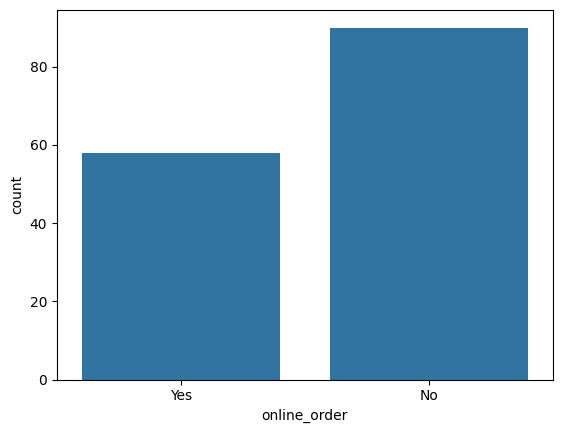

In [27]:
sns.countplot(x=df['online_order'])

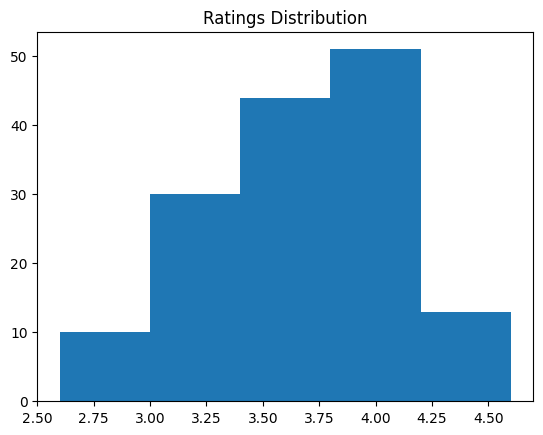

In [29]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

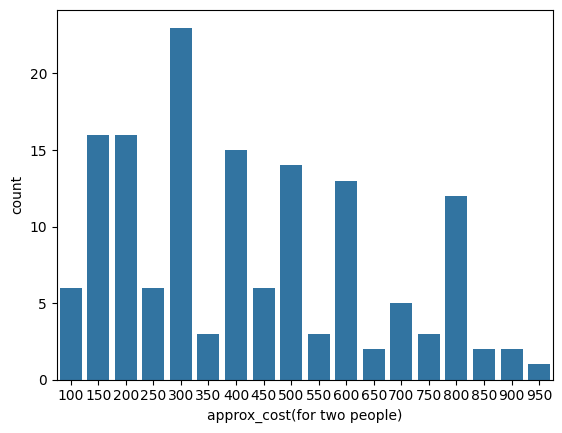

In [33]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

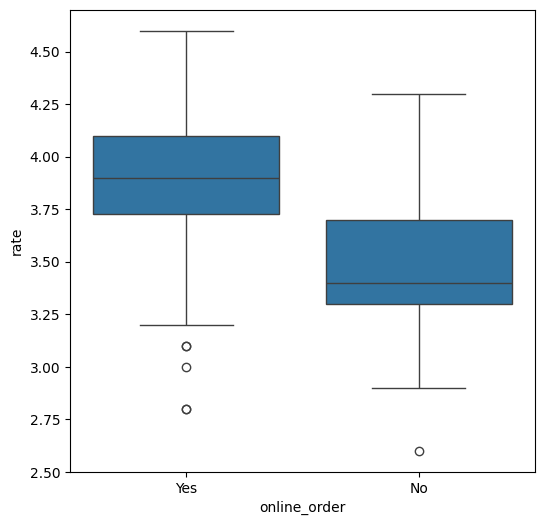

In [30]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

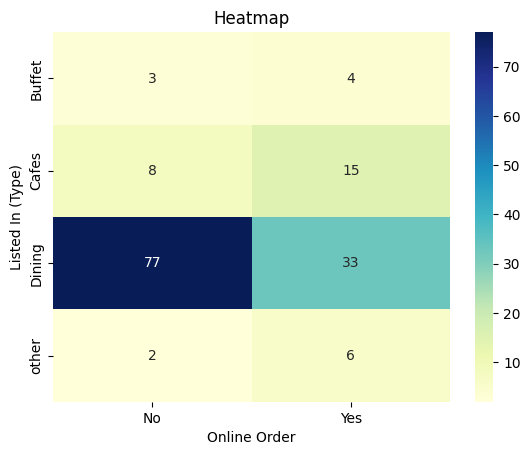

In [32]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()